In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np # linear algebra

In [2]:
data = pd.read_csv("C:/Users/acer/Downloads/iris/IRIS.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'species' column
data['species'] = label_encoder.fit_transform(data['species'])


In [7]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


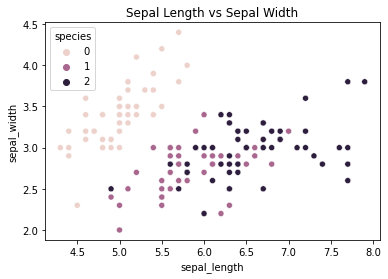

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.title('Sepal Length vs Sepal Width')
plt.show()


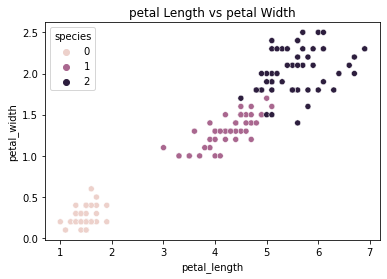

In [39]:

# Create a scatter plot
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)
plt.title('petal Length vs petal Width')
plt.show()


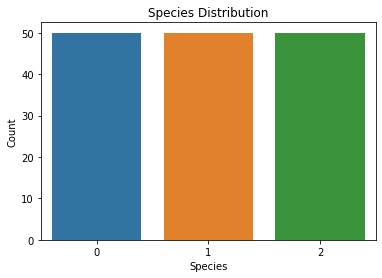

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot to show the species distribution
sns.countplot(data=data, x='species')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [8]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = data['species']  # Target


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [30]:
decision_tree = DecisionTreeClassifier(max_depth = 2, random_state=1)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

In [32]:
y_pred = decision_tree.predict(X_test)


In [34]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


In [35]:
print("Training Accuracy is: ", decision_tree.score(X_train, y_train))
print("Testing Accuracy is: ", decision_tree.score(X_test, y_test))

Training Accuracy is:  0.9583333333333334
Testing Accuracy is:  0.9666666666666667


In [41]:
new_data = pd.DataFrame({'sepal_length': [5.1], 'sepal_width': [3.5], 'petal_length': [1.4], 'petal_width': [0.2]})

# Make predictions on the new data
predictions = decision_tree.predict(new_data)
predictions

array([0])

In [43]:
reversed_predictions = label_encoder.inverse_transform(predictions)
reversed_predictions

array(['Iris-setosa'], dtype=object)